## Решающие деревья

In [92]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

plt.style.use('seaborn')

In [2]:
df = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
df

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [7]:
x = df[['X_1', 'X_2']]
y = df.Y

In [13]:
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

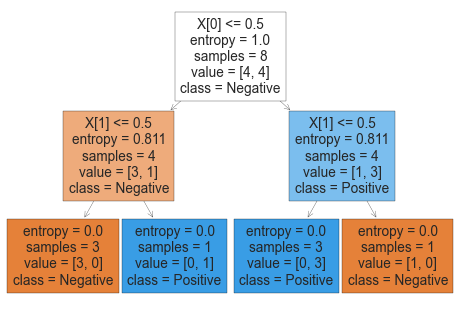

In [15]:
tree.plot_tree(clf, class_names=['Negative', 'Positive'], filled=True);

In [17]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')
df

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [43]:
df.iloc[:,1:3].columns

Index(['Шерстист', 'Гавкает'], dtype='object')

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

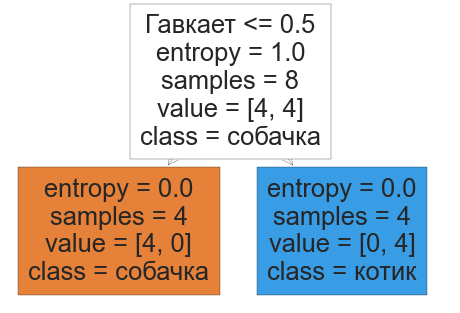

In [49]:
clf.fit(df.iloc[:,1:3], df.iloc[:,4])
tree.plot_tree(clf,
               class_names=df['Вид'].unique(),
               feature_names=df.iloc[:,1:3].columns,
               filled=True);

$$ E = - \sum p_i \cdot log_2p_i $$

$$ IG = E_{root} - (\frac{n_{left}}{n}\cdot E_{left} + \frac{n_{right}}{n}\cdot E_{right})$$

In [105]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [106]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [111]:
df.Age = df.Age.fillna(df.Age.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
X = pd.get_dummies(df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1))
y = df.Survived

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [125]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [126]:
clf.score(X_test, y_test)

0.823728813559322

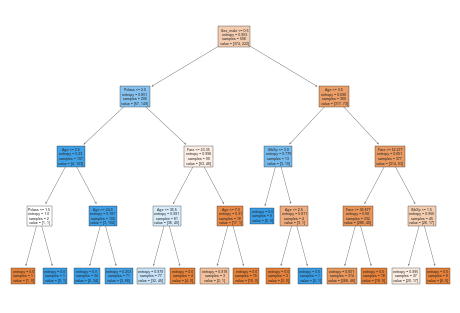

In [131]:
tree.plot_tree(clf,
               feature_names=X.columns,
               filled=True);

In [132]:
from sklearn.model_selection import cross_val_score

In [191]:
def score_depth(X_train, X_test, y_train, y_test, max_depth):
    max_depth = range(1, max_depth)
    train_res = []
    test_res = []
    cross_val = []
    for depth in max_depth:
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        clf.fit(X_train, y_train)
        train_res.append(clf.score(X_train, y_train))
        test_res.append(clf.score(X_test, y_test))
        cross_val.append(cross_val_score(clf, X_train, y_train, cv=5).mean())
    return pd.DataFrame({'Depth': max_depth,
                         'Train': train_res, 
                         'Test': test_res,
                         'Cross_val': cross_val})

In [184]:
def plot_scores(scores):
    plt.plot(scores.Depth, scores.Train)
    plt.plot(scores.Depth, scores.Test)
    plt.plot(scores.Depth, scores.Cross_val)
    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.legend(['Train', 'Test', 'Cross_val'])
    plt.show()

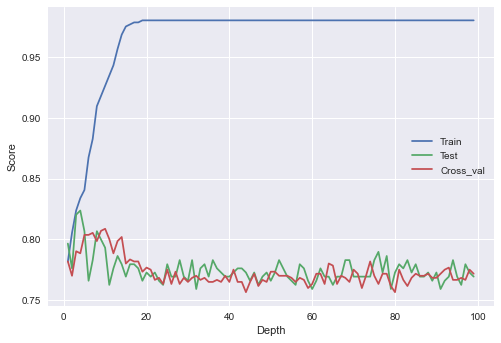

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scores = score_depth(X_train, X_test, y_train, y_test, 100)
plot_scores(scores)

In [190]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv',
                        index_col=0)
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',
                        index_col=0)
iris_train

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


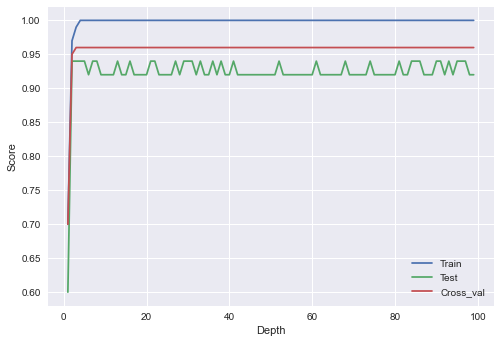

In [202]:
X_train = iris_train.drop('species', axis=1)
X_test = iris_test.drop('species', axis=1)
y_train = iris_train.species
y_test = iris_test.species
scores = score_depth(X_train, X_test, y_train, y_test, 100)
plot_scores(scores)

In [171]:
scores.Depth[scores.Cross_val.idxmax()]

3

In [177]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [181]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7903221288515405

In [206]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [215]:
df[(df['Вид'] == 'собачка') & df['Лазает по деревьям'] == 1]

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
66,29,34.8,1,1,1,собачка
107,29,34.8,1,1,1,собачка
397,21,25.2,1,1,1,собачка
399,18,21.6,1,1,1,собачка


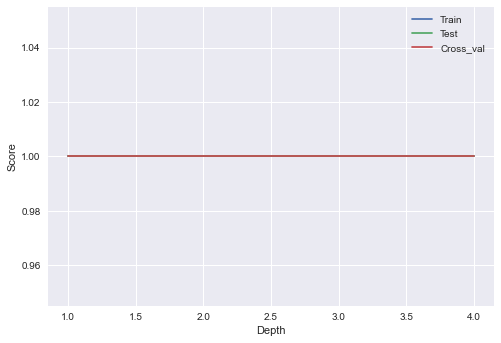

In [218]:
X = df.drop('Вид', axis=1)
y = df['Вид']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scores = score_depth(X_train, X_test, y_train, y_test, 5)
plot_scores(scores)

In [225]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [226]:
df = pd.read_json('dataset_209691_15.txt')
df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,27,32.4,1,1,0
1,22,26.4,1,1,0
2,32,38.4,1,1,0
3,20,24.0,1,1,0
4,24,28.8,1,1,0
...,...,...,...,...,...
95,7,2.8,1,0,1
96,12,4.8,1,0,1
97,13,5.2,1,0,1
98,14,5.6,1,0,1


In [230]:
y_pred = clf.predict(df)
len(y_pred[y_pred == 'собачка'])

50

In [231]:
list(y_pred).count('собачка')

50